## פרוייקט על צריכת סמים שונים והשפעתם

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url = 'https://github.com/Itamar-Melnik/My-project/raw/main/Drug_Consumption.csv'
drug_df = pd.read_csv(url)
drug_df.head(5)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


החלפנו את הנתונים של כמות צריכה, גיל, מין והשכלה לנתונים מספריים כדי שנוכל לעבוד איתם 

<AxesSubplot:xlabel='Gender', ylabel='count'>

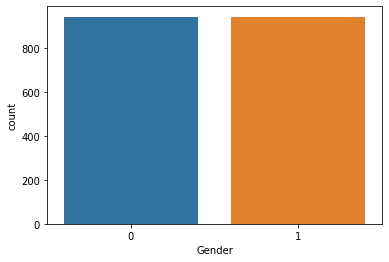

In [13]:
sns.countplot(x='Gender', data = drug_df)

In [ ]:
#drug_df['percent']=drug_df.Cannabis/drug_df.Cannabis.sum() 
fig, axes = plt.subplots(figsize=(12, 5),ncols=3)
sns.countplot(data=drug_df, x='Alcohol',ax=axes[0])
sns.countplot(x="Cannabis", data=drug_df, ax=axes[1])
sns.countplot(x='heavy_dr',data=drug_df, ax=axes[2])

<AxesSubplot:xlabel='heavy_dr', ylabel='count'>

#### כאן אנחנו מציגים את רמת הצריכה של סמים קלים(קנאביס), אלכוהול וסמים קשים

In [12]:
drug_df = drug_df.replace(['CL0','CL1','CL2','CL3','CL4','CL5','CL6'],[0,1,2,3,4,5,6])
drug_df=drug_df.replace(['18-24','25-34','35-44','45-54','55-64','65+'],[21,30,40,50,60,70])
drug_df=drug_df.replace(['F','M'],[0,1])
drug_df = drug_df.replace(['Left school before 16 years','Left school at 17 years','Left school at 18 years','no certificate or degree','Some college or university','Professional certificate/ diploma','University degree','Masters degree','Doctorate degree'],[1,2,3,4,5,6,7,8,9])

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

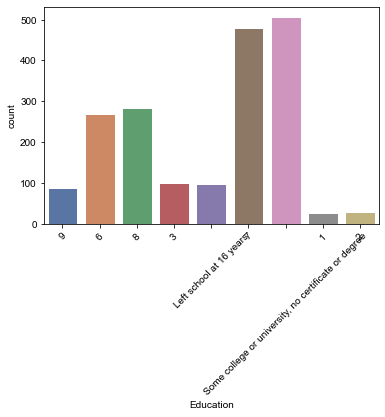

In [5]:
fig, ax = plt.subplots(1)
fig = plt.figure(1, figsize = (20,6))
sns.set(font_scale=1)
ax = sns.countplot(x='Education', data = drug_df)
plt.setp(ax.get_xticklabels(),rotation=45)

יצרנו עמודה חדשה שמחברת בין את הצריכה של כל סוגי הסמים הקשים כדי שיהיה קל יותר לעבוד איתם

<AxesSubplot:>

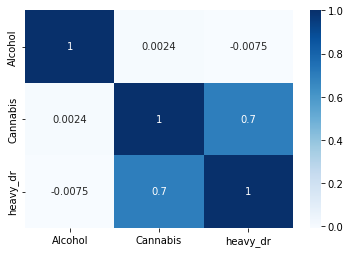

In [23]:
drug_df['heavy_dr']=drug_df[['Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Semer']].max(axis=1)
corr_data = drug_df[['Alcohol','Cannabis','heavy_dr']].corr(method='spearman')
sns.heatmap(data=corr_data,cmap='Blues', annot=True)

### יש קשר ישיר בין צריכת קנאביס לצריכת סמים קשים, כלומר ככל שבנאדם צורך יותר קנאביס כך הסיכוי שלו לצרוף סמים קשים עולה.
### לא נמצא קשר בין צריכת אלכוהול 

מספרנו את רמת ההסכלה של האנשים

<AxesSubplot:xlabel='Age', ylabel='heavy_dr'>

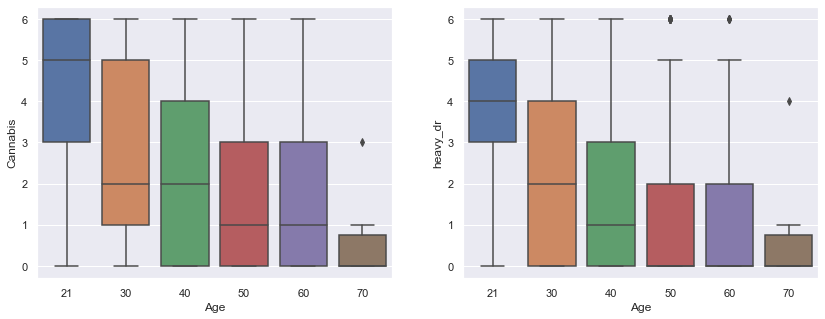

In [7]:
fig, axes = plt.subplots(figsize=(14, 5),ncols=2)
sns.boxplot(data=drug_df , x= 'Age' ,y= 'Cannabis',ax=axes[0])
sns.boxplot(data=drug_df , x= 'Age' ,y= 'heavy_dr',ax=axes[1])

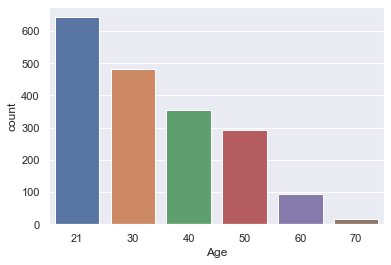

In [8]:
ax1 = sns.countplot(x='Age', data = drug_df)

### יש קורלציה בין גיל לשימוש בסמים קשים וגם לצריכת קנאביס. ע"פ הגרפים מלמעלה, ניתן לראות כי ככל שהגיל צעיר יותר יש נטייה גבוהה יותר לצרוך סמים.

<AxesSubplot:xlabel='Gender', ylabel='heavy_dr'>

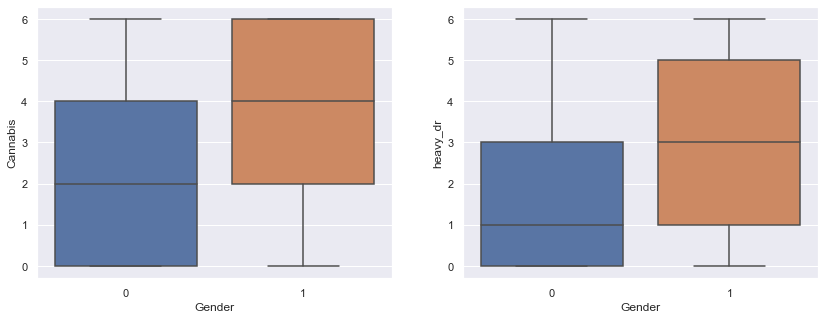

In [9]:
fig, axes = plt.subplots(figsize=(14, 5),ncols=2)
sns.boxplot(data=drug_df , x= 'Gender' ,y= 'Cannabis',ax=axes[0])
sns.boxplot(data=drug_df , x= 'Gender' ,y= 'heavy_dr',ax=axes[1])

### בהשוואה בין גברים לנשים, ניתן לראות כי גברים באופן כללי נוטים לצרוך יותר סמים מנשים.

<AxesSubplot:xlabel='Cannabis', ylabel='Oscore'>

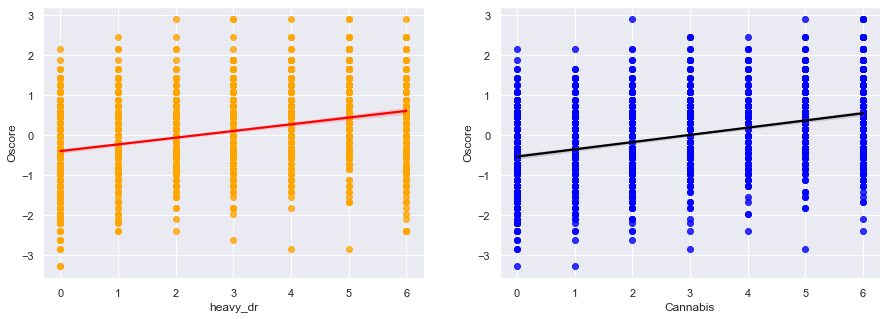

In [10]:
fig, axes = plt.subplots(figsize=(15, 5), ncols=2)
sns.regplot(data=drug_df, x='heavy_dr', y='Oscore',scatter_kws={"color": "orange"}, line_kws={"color": "red"},ax=axes[0])
sns.regplot(data=drug_df, x='Cannabis', y='Oscore',scatter_kws={"color": "blue"}, line_kws={"color": "black"},ax=axes[1])

<AxesSubplot:xlabel='heavy_dr', ylabel='Oscore'>

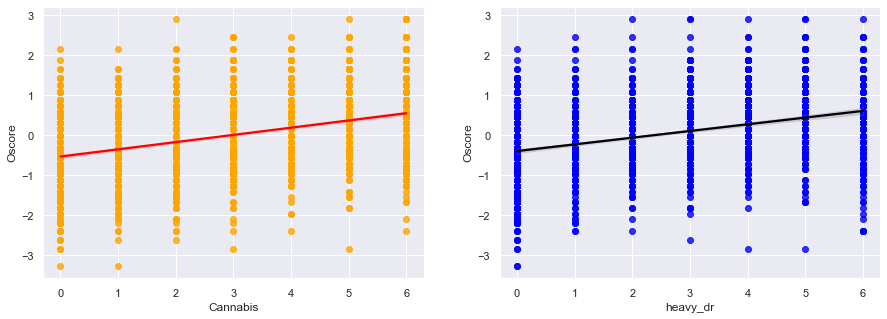

In [11]:
fig, axes = plt.subplots(figsize=(15, 5), ncols=2)
sns.regplot(data=drug_df, x='Cannabis', y='Oscore',scatter_kws={"color": "orange"}, line_kws={"color": "red"},ax=axes[0])
sns.regplot(data=drug_df, x='heavy_dr', y='Oscore',scatter_kws={"color": "blue"}, line_kws={"color": "black"},ax=axes[1])

<AxesSubplot:xlabel='Country', ylabel='Cannabis'>

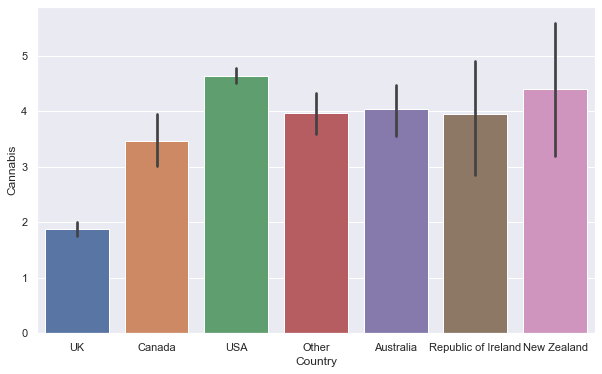

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(data=drug_df,x='Country',y='Cannabis')

### ניתן לראות שבמדינות בהן יש לגיליזציה(אישור לצרוך קנאביס) יש רמת צריכה גבוהה יותר ביחס למדינות בהן אין לגיליזציה, לכן ניתן להניח שלגיליזציה גורמת לעלייה בצריכת השימוש בקנאביס.

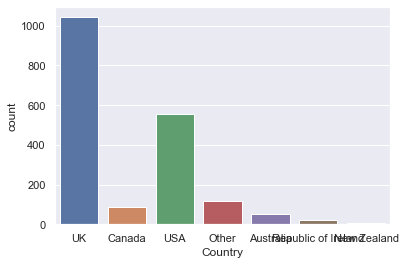

In [13]:
ax2 = sns.countplot(x='Country', data = drug_df)

<AxesSubplot:xlabel='Country', ylabel='heavy_dr'>

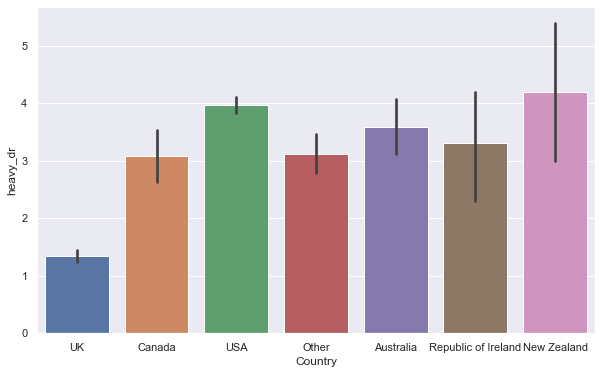

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(data=drug_df,x='Country',y='heavy_dr')

<AxesSubplot:xlabel='Country', ylabel='Oscore'>

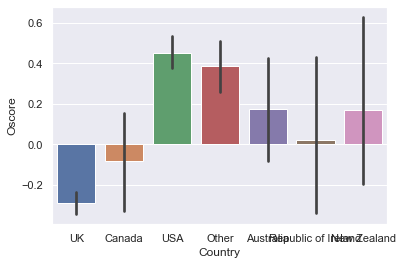

In [15]:
sns.barplot(x='Country',y='Oscore', data = drug_df)

<AxesSubplot:>

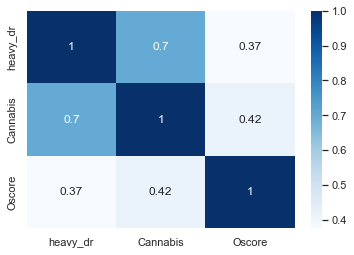

In [16]:
corr_data1 = drug_df[['heavy_dr','Cannabis','Oscore']].corr(method='spearman')
sns.heatmap(data=corr_data1,cmap='Blues', annot=True)